In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from chart_studio import plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import pandas as pd 
countries_of_interest_df = pd.read_csv("merged_Dataset.csv")

C:\Users\TameemTecnology\AppData\Local\Temp\ipykernel_13596\993136843.py:11: DtypeWarning:

Columns (147,149,150,151,153,155,156,157) have mixed types. Specify dtype option on import or set low_memory=False.



Helper Functions

In [2]:
#this function will be used to get the total number of people migrated from a country in the given year, if you dont provide the destination country
#then you will get the total number of people migrated from the origin country regarless of the destination country

def col_sum( source, year,gender,age, type, origin_country=None, destination_country = None):
    """
        source : String 
               for dataset from EUROSTAT 'ESTAT'
               for dataset from UN 'UN'
        
        year :String 
                year for the data
        gender : String 
                'T' for both, 
                'M' for Male, 
                'F' for Female
        age : String 
                'T' for all ages, 
                for below 15 '<15', 
                between 15- 64 '15-64',
                above 64 '>64',
        type : String 
               for citizen type migration 'cit',
               for residence type migration 'res'
        origin_country : String 
                name of the origin country
        origin_country: String  
                name of the origin country
        destination_country : 
                String name of the destination country
        
    
    """
    if origin_country and destination_country:
        
        value = countries_of_interest_df[(countries_of_interest_df['origin_name']==origin_country) & (countries_of_interest_df['destination_name']==destination_country)][f'{source}_{year}_{gender}_{age}_{type}'].sum()

    elif origin_country:
        
        value = countries_of_interest_df[(countries_of_interest_df['origin_name']==origin_country)][f'{source}_{year}_{gender}_{age}_{type}'].sum()
    
    return value




In [3]:
#this function with the help of col_sum() function will built a bar graph for a country showing the total number of people, 
#total number of male and total number of female migrated from that country in the time span of 5 years from 2014-2019 for ESTAT
#and from 2015-2019 for UN dataset
def bar_graph_of_country(origin_country, source, type):
    '''
        source : String 
               for dataset from EUROSTAT 'ESTAT'
               for dataset from UN 'UN'
        origin_country: String  
                name of the origin country
        type : String 
               for citizen type migration 'cit',
               for residence type migration 'res'
    '''
    if source == "UN": #for UN we have data for the years 2015-2019
        graph_for_a_country = {'2015':{'Both':col_sum(source, "2015", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2015", "M", "T", type, origin_country  ),'Female': col_sum(source, "2015", "F", "T", type, origin_country  )},
                                                                                    '2016':{'Both':col_sum(source, "2016", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2016", "M", "T", type, origin_country  ),'Female': col_sum(source, "2016", "F", "T", type, origin_country  )},
                                                                                    '2017':{'Both':col_sum(source, "2017", "T", "T", type, origin_country ), 'Male':col_sum(source, "2017", "M", "T", type, origin_country  ),'Female': col_sum(source, "2017", "F", "T", type, origin_country  )},
                                                                                    '2018':{'Both':col_sum(source, "2018", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2018", "M", "T", type, origin_country  ),'Female': col_sum(source, "2018", "F", "T", type, origin_country  )},
                                                                                    '2019':{'Both':col_sum(source, "2019", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2019", "M", "T", type, origin_country  ),'Female': col_sum(source, "2019", "F", "T", type, origin_country )}
                                                                                    }

    else: #for ESTAT we have data for the years 2014-2019
        graph_for_a_country = {'2014':{'Both':col_sum(source, "2014", "T", "T", type, origin_country ), 'Male':col_sum(source, "2014", "M", "T", type, origin_country  ),'Female': col_sum(source, "2014", "F", "T", type, origin_country  )},
                                                                                    '2015':{'Both':col_sum(source, "2015", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2015", "M", "T", type, origin_country  ),'Female': col_sum(source, "2015", "F", "T", type, origin_country  )},
                                                                                    '2016':{'Both':col_sum(source, "2016", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2016", "M", "T", type, origin_country  ),'Female': col_sum(source, "2016", "F", "T", type, origin_country  )},
                                                                                    '2017':{'Both':col_sum(source, "2017", "T", "T", type, origin_country ), 'Male':col_sum(source, "2017", "M", "T", type, origin_country  ),'Female': col_sum(source, "2017", "F", "T", type, origin_country  )},
                                                                                    '2018':{'Both':col_sum(source, "2018", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2018", "M", "T", type, origin_country  ),'Female': col_sum(source, "2018", "F", "T", type, origin_country  )},
                                                                                    '2019':{'Both':col_sum(source, "2019", "T", "T", type, origin_country  ), 'Male':col_sum(source, "2019", "M", "T", type, origin_country  ),'Female': col_sum(source, "2019", "F", "T", type, origin_country )}
                                                                                    }
    
    return graph_for_a_country

    
    

Bar graph showing Male, Female and Both(Male and Female) ratio of the imigrants with residence status in the respective years w.r.t the origin country. The results are for ESTAT dataset.

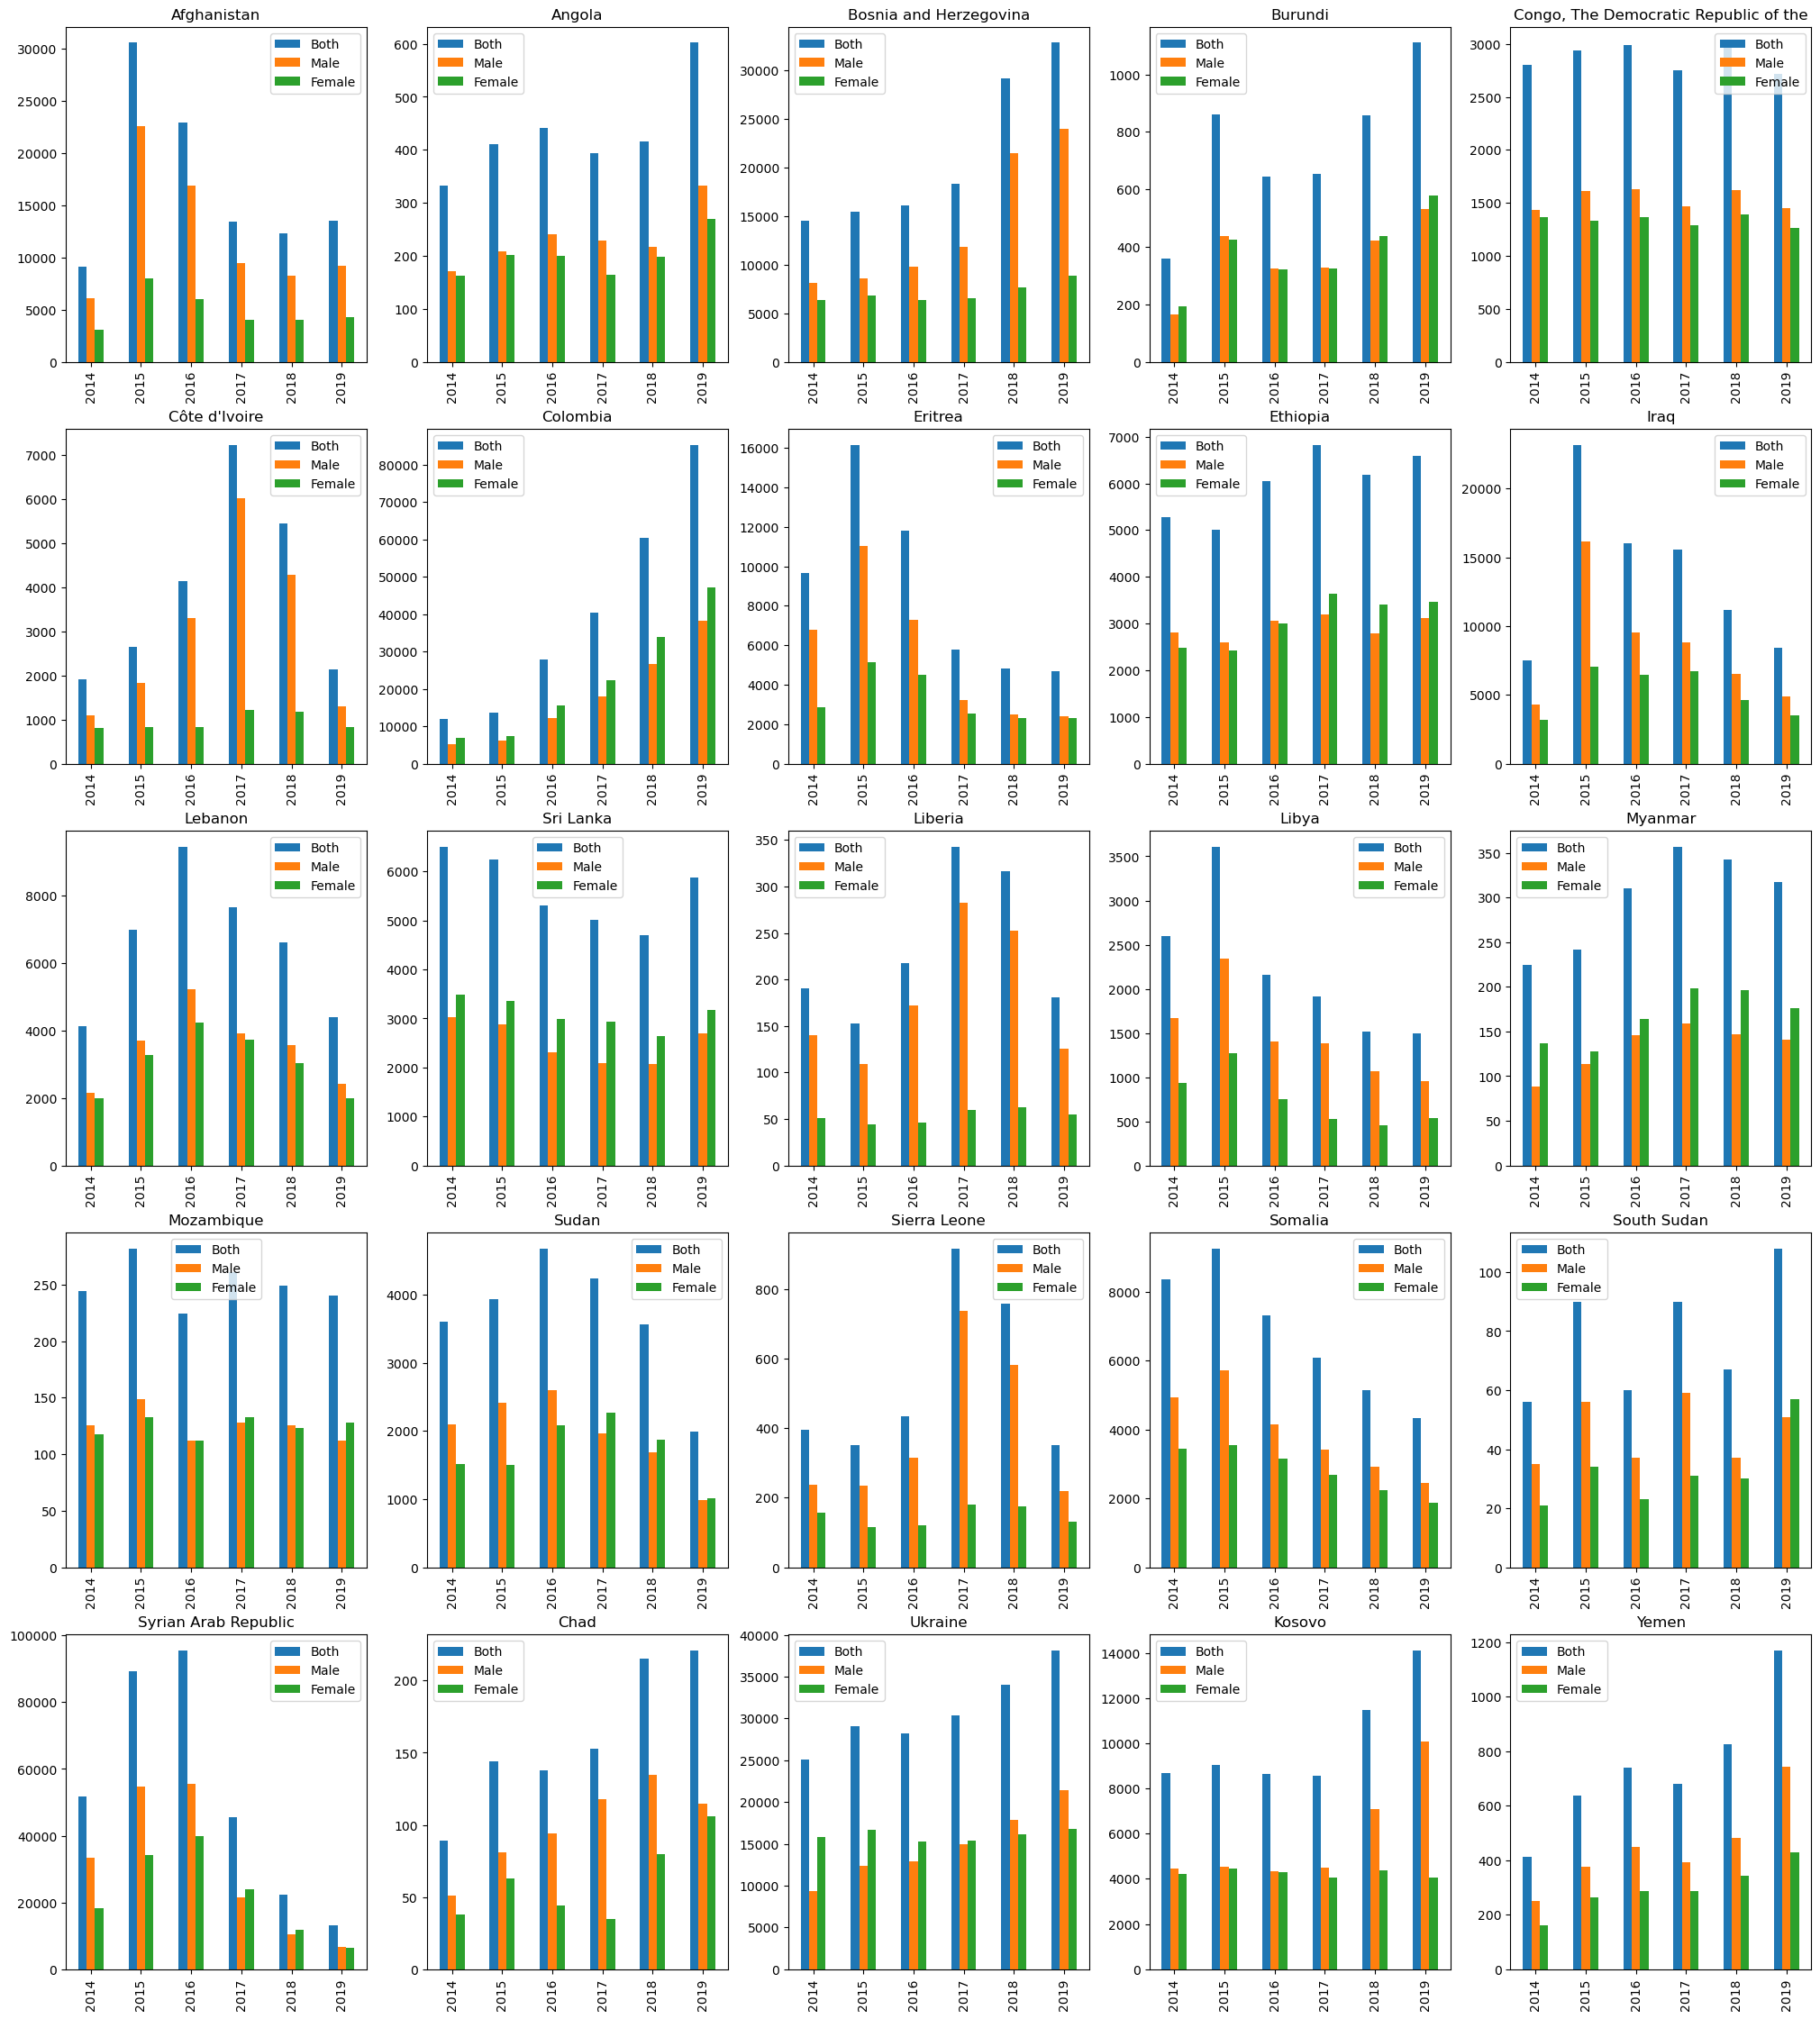

In [4]:

#geting a list of the unique country names
country_names = countries_of_interest_df['origin_name'].unique().tolist()
#dividing the single list into 5 nested lists for convenience for the later part where we will plot graph
country_names = [country_names[i:i+5] for i in range(0, len(country_names), 5)]
fig, axes = plt.subplots(5, 5, figsize=(25,28))
#by making nested lists we can iterated over the country names and also plot the graph at the given axis easily
for i in range(0,5):
    for j in range(0,5):
        graph_for_a_country = bar_graph_of_country(country_names[i][j], "ESTAT", "res")
        x = pd.DataFrame(graph_for_a_country)
        #this is the part where our nested list will come handy, we can use the same i and j indices for axis[i,j] 
        #that we used above to fetch country name
        x.transpose().plot(ax=axes[i,j], kind='bar', title= country_names[i][j])
    






Bar graph showing Male, Female and Both(Male and Female) ratio of the imigrants with citizenship status in the respective years w.r.t the origin country. The results are for ESTAT dataset.

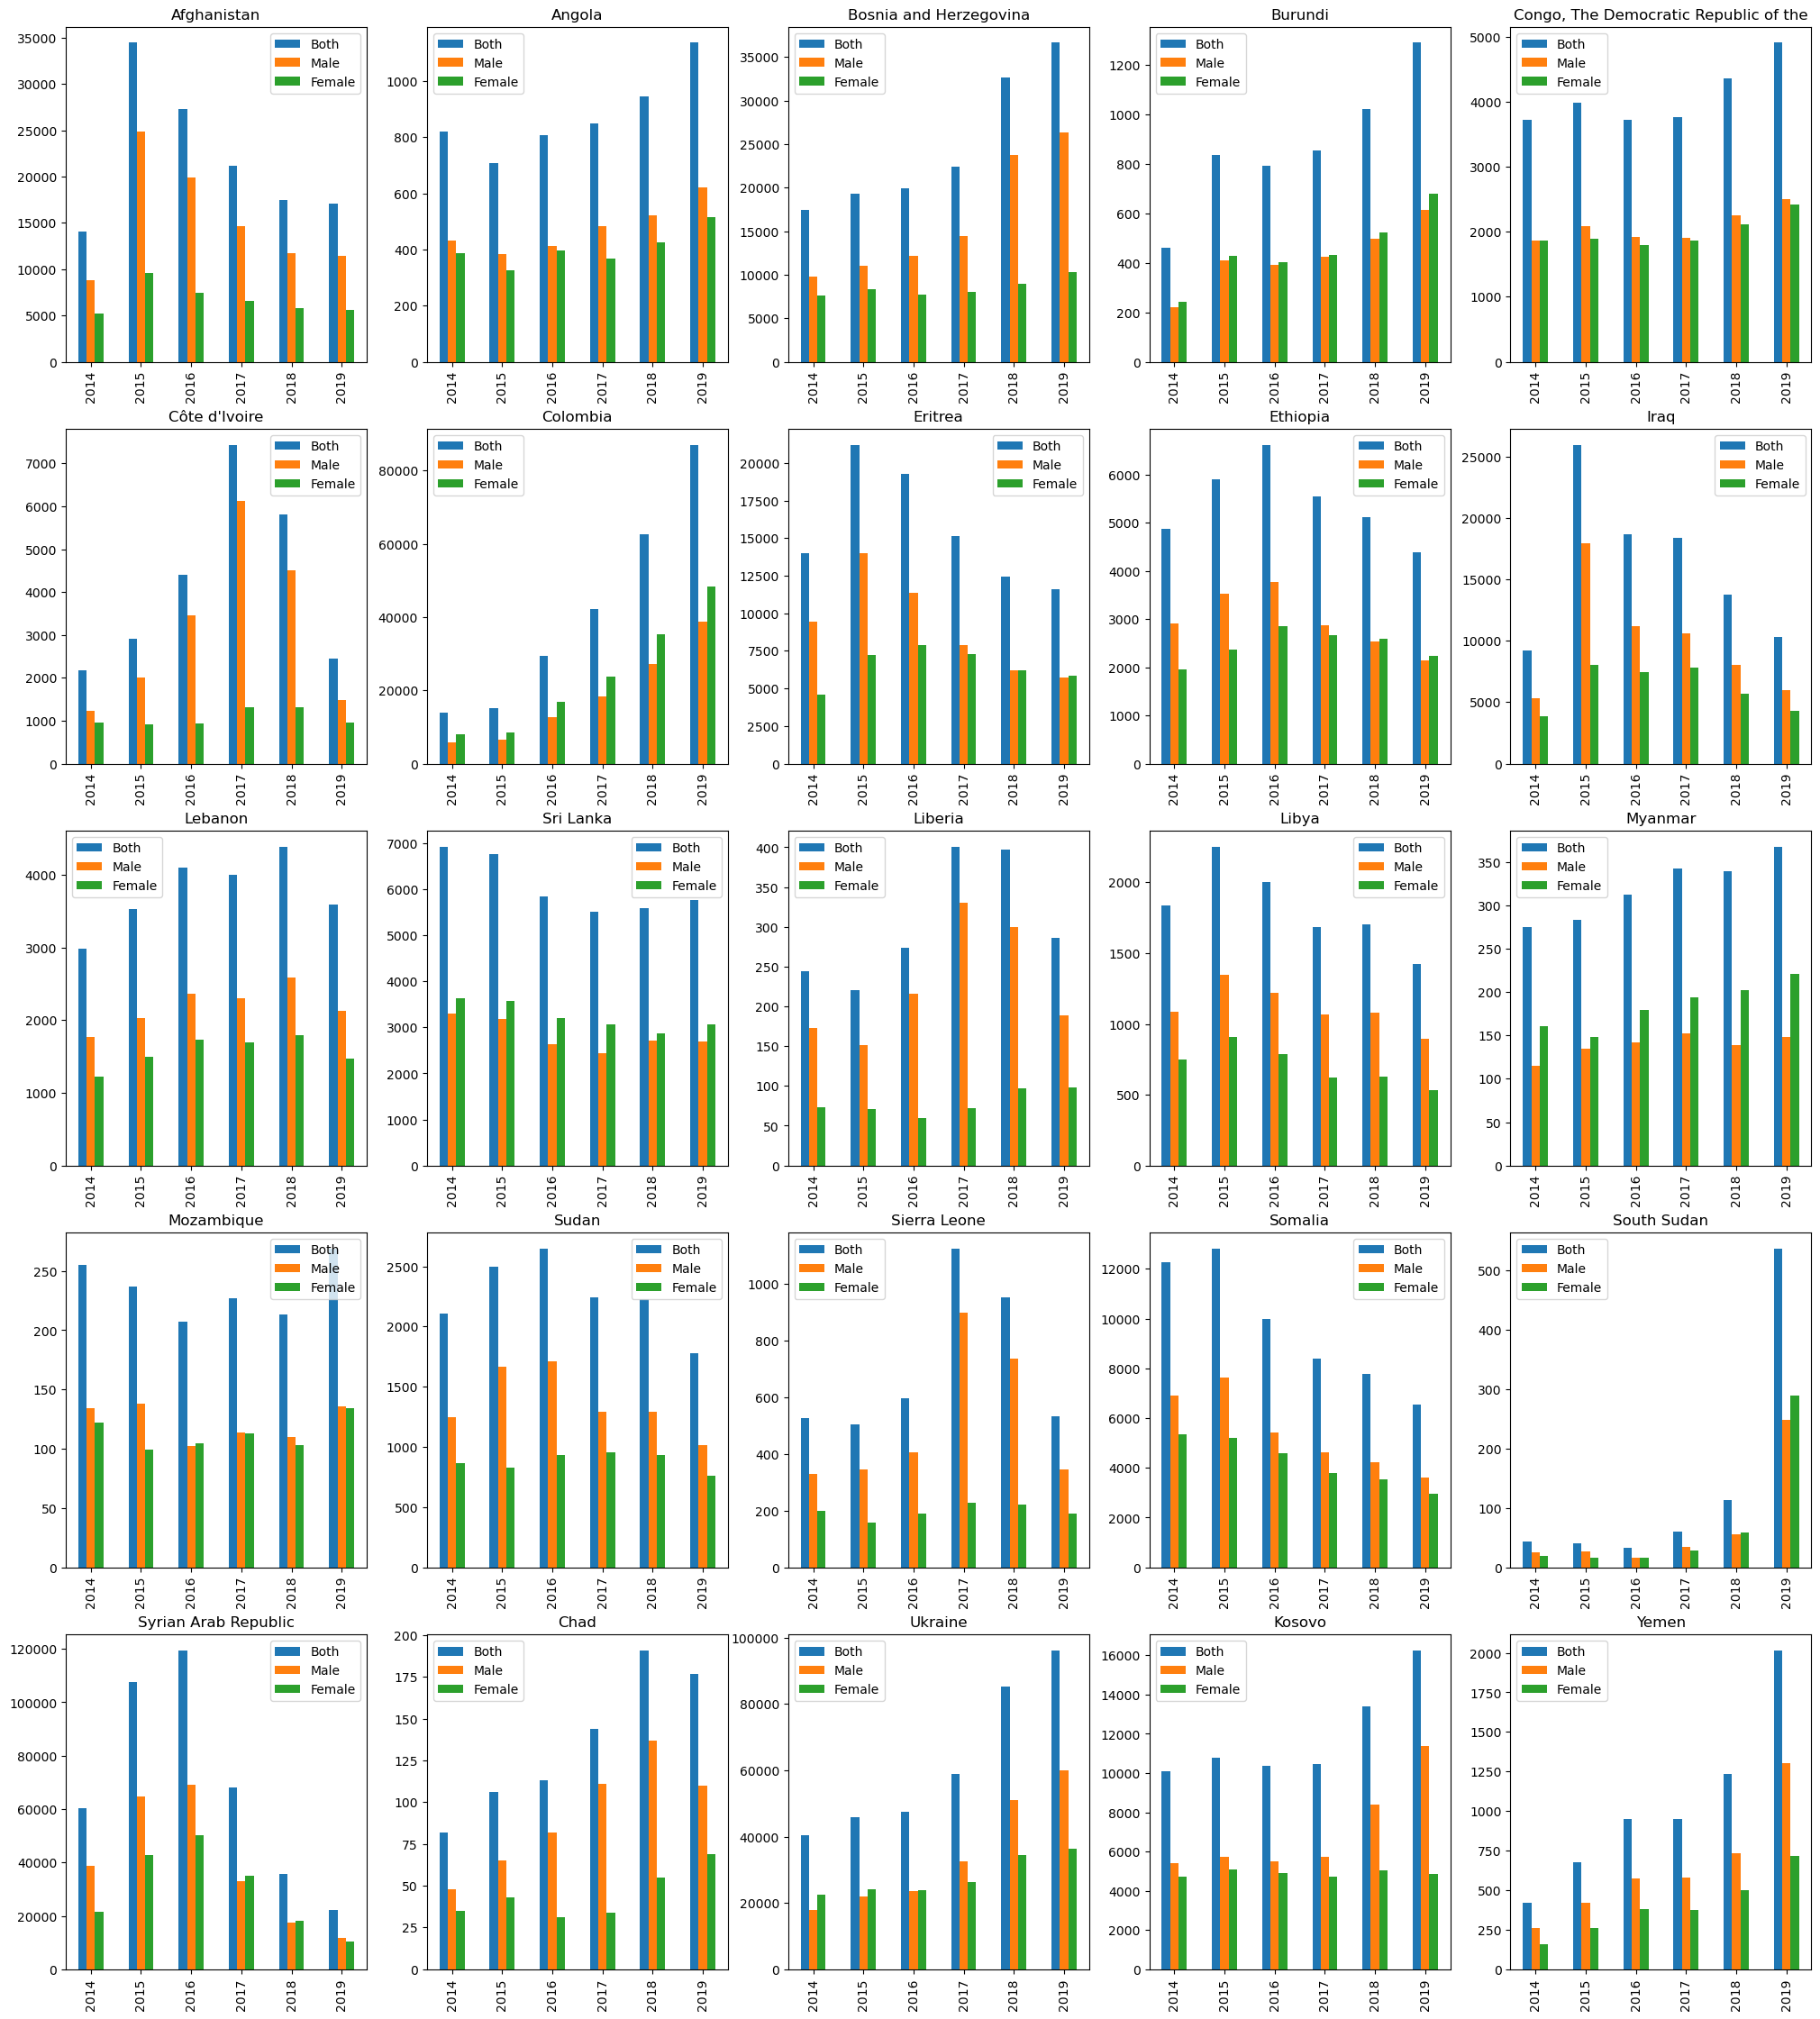

In [5]:
#geting a list of the unique country names
country_names = countries_of_interest_df['origin_name'].unique().tolist()
#dividing the single list into 5 nested lists for convenience for the later part where we will plot graph
country_names = [country_names[i:i+5] for i in range(0, len(country_names), 5)]
fig, axes = plt.subplots(5, 5, figsize=(25,28))
#by making nested lists we can iterated over the country names and also plot the graph at the given axis easily
for i in range(0,5):
    for j in range(0,5):
        graph_for_a_country = bar_graph_of_country(country_names[i][j], "ESTAT", "cit")
        x = pd.DataFrame(graph_for_a_country)
        #this is the part where our nested list will come handy, we can use the same i and j indices for axis[i,j] 
        #that we used above to fetch country name
        x.transpose().plot(ax=axes[i,j], kind='bar', title= country_names[i][j])

Seperated DataFrame which shows total number of emigrants from the origin countries who left their countries to seek residence in 6 years(2014-2019)

In [6]:
residence_perpose = countries_of_interest_df
residence_perpose['residence_sum_5_years'] = residence_perpose['ESTAT_2014_F_T_res'] + residence_perpose['ESTAT_2015_F_T_res'] + residence_perpose['ESTAT_2016_F_T_res'] + residence_perpose['ESTAT_2017_F_T_res']+residence_perpose['ESTAT_2018_F_T_res']+residence_perpose['ESTAT_2019_F_T_res']

group_residence = residence_perpose.groupby(['origin_name', 'origin_alpha_3'])
group_residence = group_residence.agg({'residence_sum_5_years': np.sum})

group_residence = pd.DataFrame(group_residence)
group_residence = group_residence.reset_index()


# sum_group_residence = group_residence['residence_sum_5_years'].sum()
# sum_group_residence = pd.DataFrame(sum_group_residence)
# sum_group_residence['origin_name']
# # size = group.agg({'destination_name':[np.size]})
# group[['ESTAT_2014_F_T_res']+['ESTAT_2015_F_T_res']].


C:\Users\TameemTecnology\AppData\Local\Temp\ipykernel_13596\1282738831.py:5: FutureWarning:

The provided callable <function sum at 0x000001E46ED28C20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



In [7]:


init_notebook_mode(connected=True) 
data = dict(type = 'choropleth',
            locations = group_residence['origin_alpha_3'],
            locationmode = 'ISO-3',
            colorscale= 'temps',
            
            text= group_residence['origin_name'],
            z=group_residence['residence_sum_5_years'],
            colorbar = {'title':'Number of migrants'})
layout = dict(geo = {'scope':'world'}, title= "Graph showing number of migrants from Post conflict contries with Residence status")
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

Seperated DataFrame which shows total number of emigrants from the origin countries who left their countries to seek citizenship in 6 years(2014-2019)

In [8]:
citizen_perpose = countries_of_interest_df
citizen_perpose['citizen_sum_5_years'] = citizen_perpose['ESTAT_2014_F_T_cit'] + citizen_perpose['ESTAT_2015_F_T_cit'] + citizen_perpose['ESTAT_2016_F_T_cit'] + citizen_perpose['ESTAT_2017_F_T_cit']+citizen_perpose['ESTAT_2018_F_T_res']+citizen_perpose['ESTAT_2019_F_T_cit']

group_citizen = citizen_perpose.groupby(['origin_name', 'origin_alpha_3'])
group_citizen = group_citizen.agg({'citizen_sum_5_years': np.sum})

group_citizen = pd.DataFrame(group_citizen)
group_citizen = group_citizen.reset_index()
group_citizen

C:\Users\TameemTecnology\AppData\Local\Temp\ipykernel_13596\2014147544.py:5: FutureWarning:

The provided callable <function sum at 0x000001E46ED28C20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,origin_name,origin_alpha_3,citizen_sum_5_years
0,Afghanistan,AFG,37865.0
1,Angola,AGO,1977.0
2,Bosnia and Herzegovina,BIH,48685.0
3,Burundi,BDI,2591.0
4,Chad,TCD,288.0
5,Colombia,COL,138902.0
6,"Congo, The Democratic Republic of the",COD,11058.0
7,Côte d'Ivoire,CIV,6067.0
8,Eritrea,ERI,34732.0
9,Ethiopia,ETH,15296.0


In [9]:
#ploting countries on worldmap
data = dict(type = 'choropleth',
            locations = group_citizen['origin_alpha_3'],
            locationmode = 'ISO-3',
            colorscale= 'temps',
            
            text= group_citizen['origin_name'],
            z=group_citizen['citizen_sum_5_years'],
            colorbar = {'title':'Number of migrants'})
layout = dict(geo = {'scope':'world'}, title= "Graph showing number of migrants from Post conflict contries with Citizen Status")
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [10]:
#to seperate numeric type columns for Analysis
data = []
for i in countries_of_interest_df.columns:
    if is_numeric_dtype(countries_of_interest_df[i]):
        data.append(i)
    
print(data)

['ESTAT_2014_T_T_cit', 'ESTAT_2014_T_T_res', 'ESTAT_2014_T_<15_cit', 'ESTAT_2014_T_<15_res', 'ESTAT_2014_T_15-64_cit', 'ESTAT_2014_T_15-64_res', 'ESTAT_2014_T_>64_cit', 'ESTAT_2014_T_>64_res', 'ESTAT_2014_M_T_cit', 'ESTAT_2014_M_T_res', 'ESTAT_2014_M_<15_cit', 'ESTAT_2014_M_<15_res', 'ESTAT_2014_M_15-64_cit', 'ESTAT_2014_M_15-64_res', 'ESTAT_2014_M_>64_cit', 'ESTAT_2014_M_>64_res', 'ESTAT_2014_F_T_cit', 'ESTAT_2014_F_T_res', 'ESTAT_2014_F_<15_cit', 'ESTAT_2014_F_<15_res', 'ESTAT_2014_F_15-64_cit', 'ESTAT_2014_F_15-64_res', 'ESTAT_2014_F_>64_cit', 'ESTAT_2014_F_>64_res', 'ESTAT_2015_T_T_cit', 'ESTAT_2015_T_T_res', 'ESTAT_2015_T_<15_cit', 'ESTAT_2015_T_<15_res', 'ESTAT_2015_T_15-64_cit', 'ESTAT_2015_T_15-64_res', 'ESTAT_2015_T_>64_cit', 'ESTAT_2015_T_>64_res', 'ESTAT_2015_M_T_cit', 'ESTAT_2015_M_T_res', 'ESTAT_2015_M_<15_cit', 'ESTAT_2015_M_<15_res', 'ESTAT_2015_M_15-64_cit', 'ESTAT_2015_M_15-64_res', 'ESTAT_2015_M_>64_cit', 'ESTAT_2015_M_>64_res', 'ESTAT_2015_F_T_cit', 'ESTAT_2015_F_T_r

Relation between origin countries GDP and number of migrants over the period of 6 years (2014-2019)

C:\Users\TameemTecnology\AppData\Local\Temp\ipykernel_13596\3521083492.py:10: FutureWarning:

The provided callable <function sum at 0x000001E46ED28C20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

C:\Users\TameemTecnology\AppData\Local\Temp\ipykernel_13596\3521083492.py:10: FutureWarning:

The provided callable <function sum at 0x000001E46ED28C20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



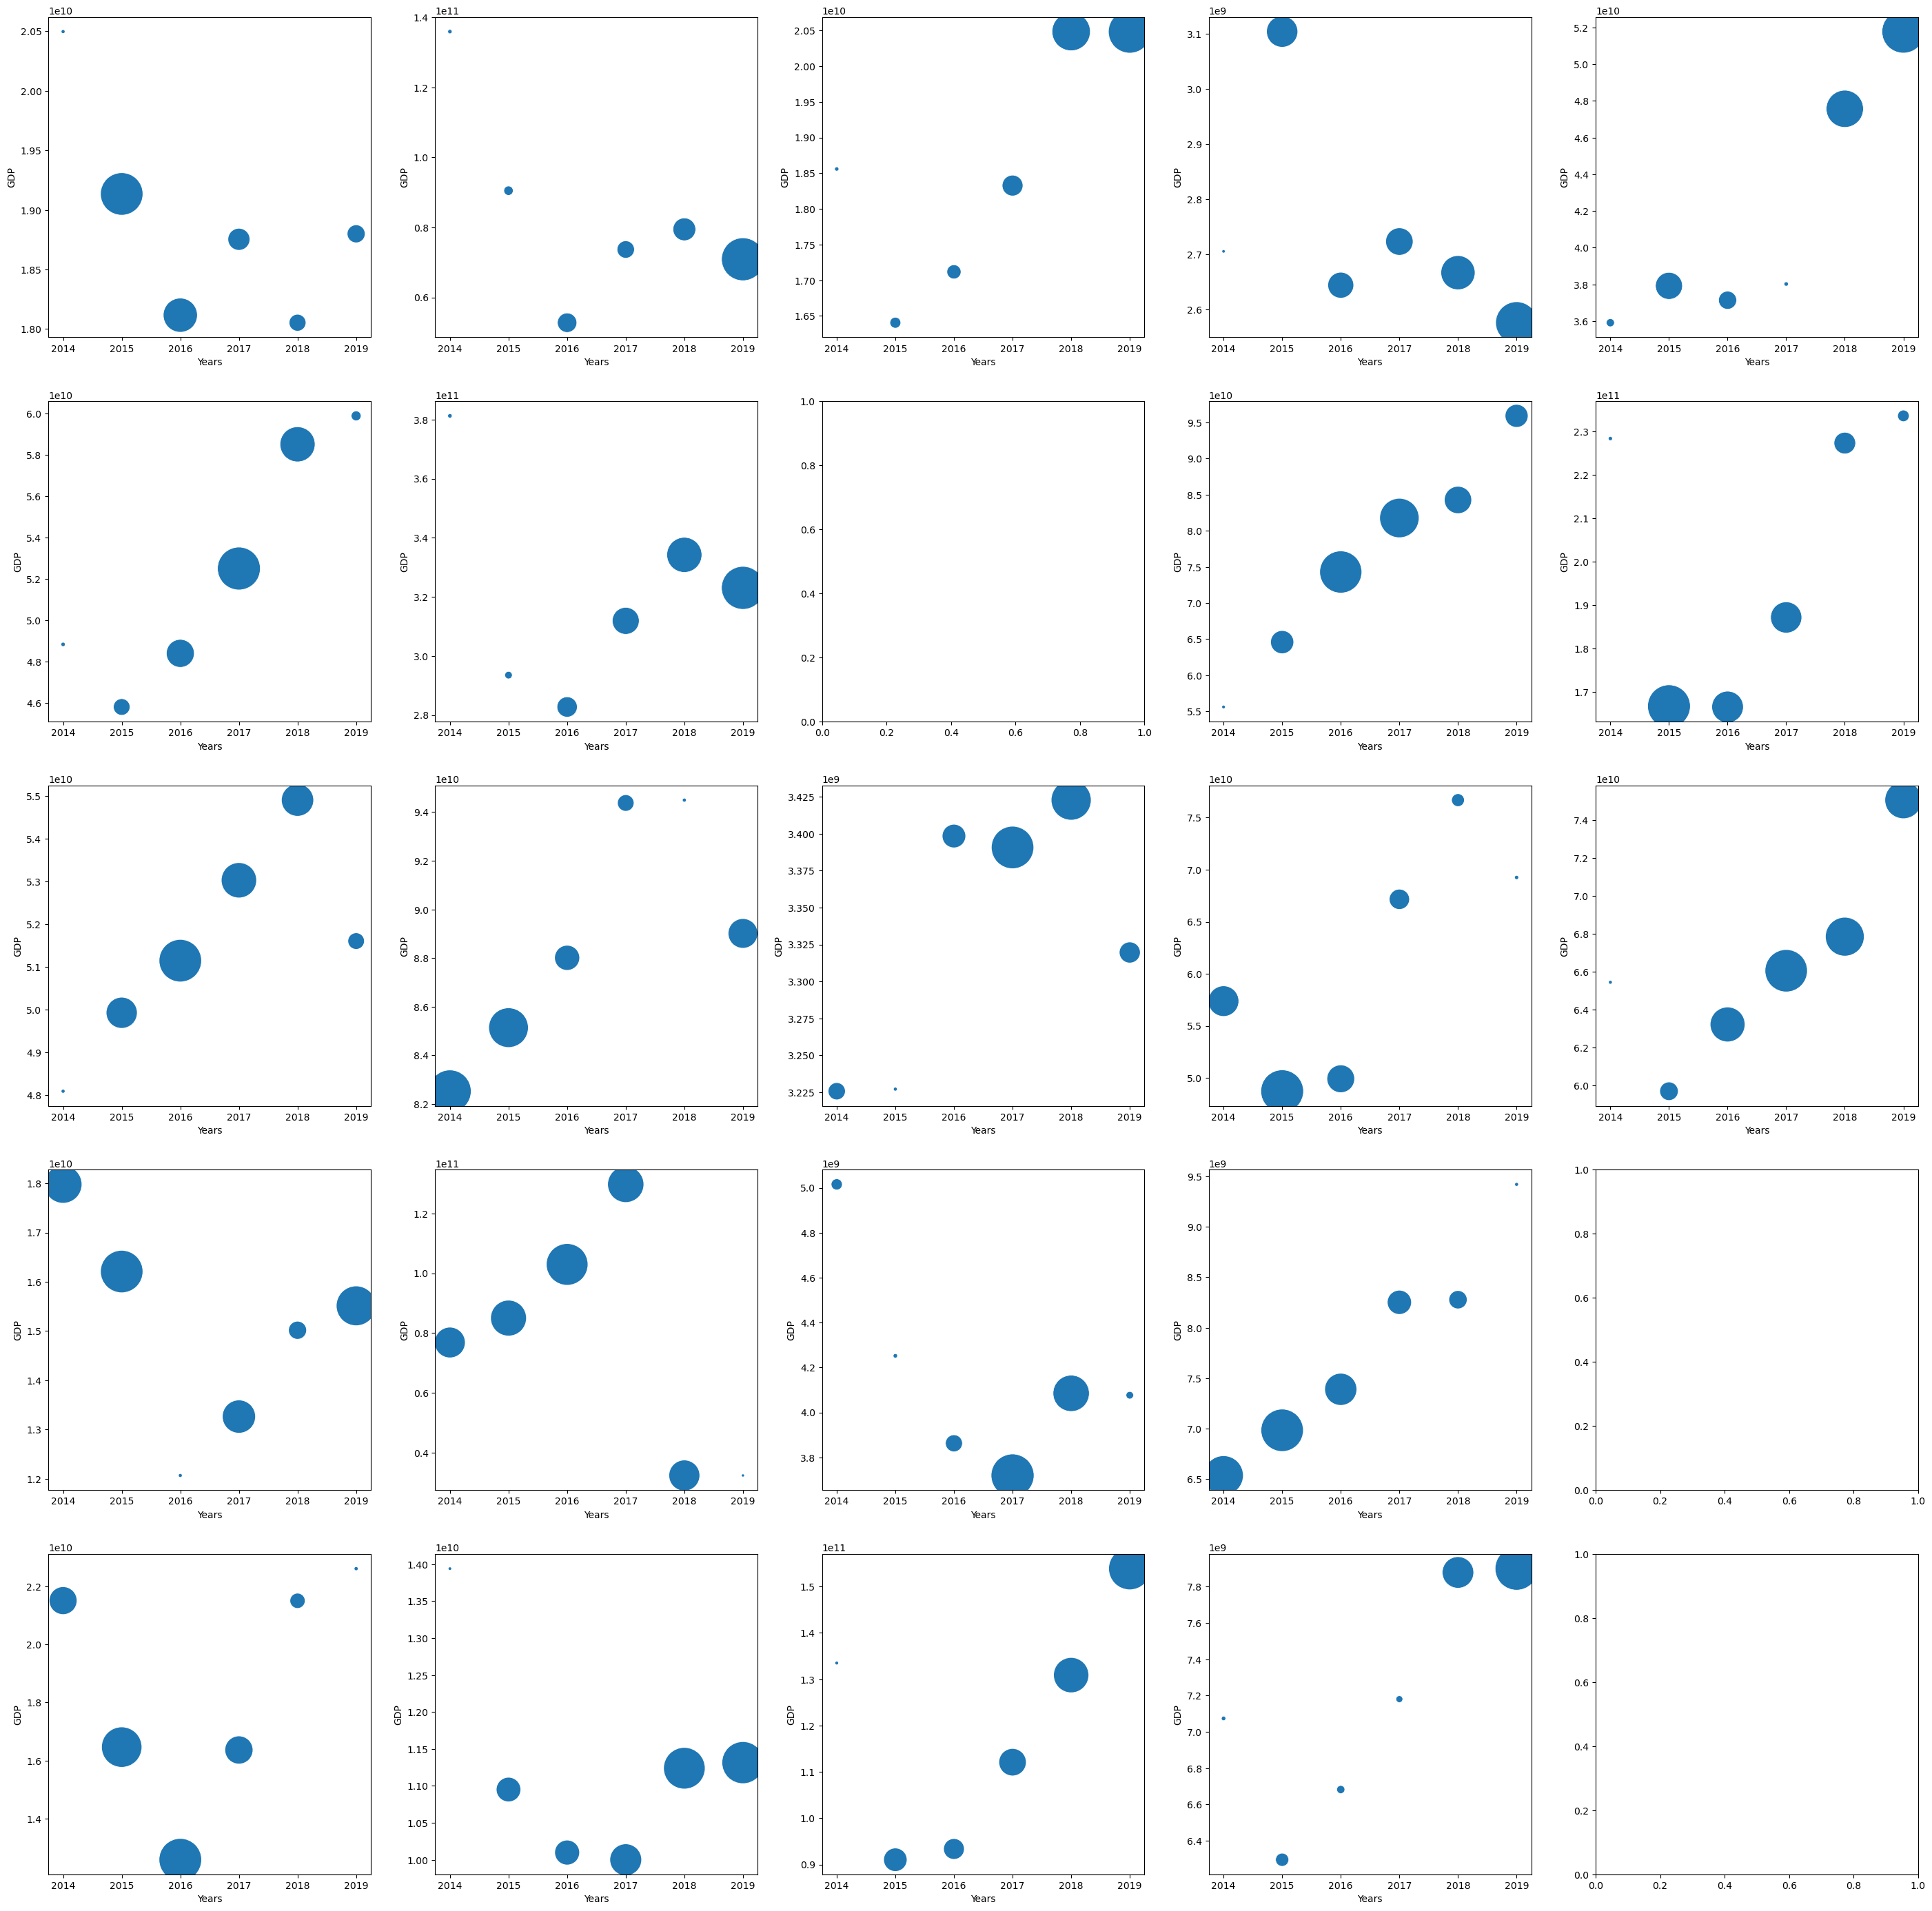

In [11]:
GDP=  countries_of_interest_df
#seperate columns for total of resident and citizen emmigrants
GDP ['Estst_Total_migrant_2014'] = GDP['ESTAT_2014_T_T_cit']+GDP['ESTAT_2014_T_T_res']
GDP ['Estst_Total_migrant_2015'] = GDP['ESTAT_2015_T_T_cit']+GDP['ESTAT_2015_T_T_res']
GDP ['Estst_Total_migrant_2016'] = GDP['ESTAT_2016_T_T_cit']+GDP['ESTAT_2016_T_T_res']
GDP ['Estst_Total_migrant_2017'] = GDP['ESTAT_2017_T_T_cit']+GDP['ESTAT_2017_T_T_res']
GDP ['Estst_Total_migrant_2018'] = GDP['ESTAT_2018_T_T_cit']+GDP['ESTAT_2018_T_T_res']
GDP ['Estst_Total_migrant_2019'] = GDP['ESTAT_2019_T_T_cit']+GDP['ESTAT_2019_T_T_res']
gdp_group = GDP.groupby(['origin_name','origin_gdp_2014','origin_gdp_2015','origin_gdp_2016','origin_gdp_2017','origin_gdp_2018','origin_gdp_2019'])
group_cit_gdp = gdp_group.agg({'Estst_Total_migrant_2014': np.sum,
                               'Estst_Total_migrant_2015': np.sum,
                                   'Estst_Total_migrant_2016': np.sum,
                                   'Estst_Total_migrant_2017': np.sum,
                                   'Estst_Total_migrant_2018': np.sum,
                                   'Estst_Total_migrant_2019': np.sum})

group_cit_gdp
group_cit_gdp = pd.DataFrame(group_cit_gdp)
group_cit_gdp=group_cit_gdp.reset_index()

#columns for x axis values
X = ['Estst_Total_migrant_2014','Estst_Total_migrant_2015','Estst_Total_migrant_2016',
                                   'Estst_Total_migrant_2017',
                                   'Estst_Total_migrant_2018',
                                   'Estst_Total_migrant_2019']
#columns for y axis values
Y = ['origin_gdp_2014','origin_gdp_2015','origin_gdp_2016','origin_gdp_2017','origin_gdp_2018','origin_gdp_2019']


empty = ['Eritrea','South Sudan', 'Yemen'] #countries whos gdp is missing in the data
fig,ax = plt.subplots(5,5, figsize=(35,35))


# for i in range(0,5):
#     for j in range(0,5):
#         x=[]
#         y=[]
        
#         if country_names[i][j] not in empty:
#             for E in X:
#                 x.append(group_cit_gdp[group_cit_gdp['origin_name']==country_names[i][j]][E].item())
#             for G in Y:
#                 y.append(group_cit_gdp[group_cit_gdp['origin_name']==country_names[i][j]][G].item())
#             ax[i][j].plot(x,y, label=f"{country_names[i][j]}")
#             ax[i][j].set_xlabel("Number of emmigrats")
#             ax[i][j].set_ylabel("GDP of origin country")
    
#             ax[i][j].legend()
        
# plt.title("Relationship between origin countries GDP and Number of emmigrants")
x=['2014','2015','2016','2017','2018','2019']
for i in range(0,5):
    for j in range(0,5):
        population=[]
        gdp=[]
        
        if country_names[i][j] not in empty:
            for E in X:
                population.append(group_cit_gdp[group_cit_gdp['origin_name']==country_names[i][j]][E].item())
            for G in Y:
                gdp.append(group_cit_gdp[group_cit_gdp['origin_name']==country_names[i][j]][G].item())
            sns.scatterplot(x=x, y=gdp, size=population, legend=False, sizes=(20, 2000), ax=ax[i][j])
            ax[i][j].set_xlabel("Years")
            ax[i][j].set_ylabel("GDP")
            
            







In [13]:

#Extracting the data of origin countries and the destionation countries the distances between them 
#This data is stored in a data frame called df_selected


# Define the specific column name to check against
column_to_check = 'origin_name'  # Replace with your column name

# Define columns to be selected
selected_columns = ['origin_name','destination_name', 'destination_cont_name','geodesic_distance_km']  # Replace with your column names

# Initialize an empty DataFrame to store the selected rows
df_selected = pd.DataFrame(columns=selected_columns)

# Use a loop to generate conditions and select rows
for name in country_names[0]:
    condition = countries_of_interest_df[column_to_check] == name
    selected_rows = countries_of_interest_df.loc[condition, selected_columns]
    df_selected = pd.concat([df_selected, selected_rows], ignore_index=True)

print(df_selected)

                               origin_name              destination_name  \
0                              Afghanistan                     Argentina   
1                              Afghanistan                       Austria   
2                              Afghanistan                     Australia   
3                              Afghanistan                         Aruba   
4                              Afghanistan                 Åland Islands   
..                                     ...                           ...   
488  Congo, The Democratic Republic of the                         Sudan   
489  Congo, The Democratic Republic of the  Tanzania, United Republic of   
490  Congo, The Democratic Republic of the                          Togo   
491  Congo, The Democratic Republic of the                        Turkey   
492  Congo, The Democratic Republic of the                        Zambia   

    destination_cont_name  geodesic_distance_km  
0          America, South          15

C:\Users\TameemTecnology\AppData\Local\Temp\ipykernel_13596\4149488253.py:18: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [17]:
'''Getting the countries within a fixed distance from the origin country
the function takes four parameters, 
df = the data frame 
origin = the origin country 
fixed_distance = this a chosen fixed distance to compare against, here it is taken to be 1000 where this number correseponds to the neighbors'''
def find_related_destinations(df, origin, fixed_distance):
    # Filter rows where 'origin name' matches the input origin
    origin_rows = df[df['origin_name'] == origin]
    origin_rows = pd.DataFrame(origin_rows) 
    # Initialize a list to store related destinations
    related_destinations = []
    total_migrants = 0 
    # Iterate over rows with the matching origin
    # for index, row in origin_rows.iterrows():
    #     # Filter rows where 'destination name' matches the current row's destination
    #     related_rows = df[df['destination_name'] == row['destination_name']]

        # Compare the distance to the fixed number
    for _, related_row in origin_rows.iterrows():
        if related_row['geodesic_distance_km'] <= fixed_distance:
            # If the distance matches, add the related destination to the list
            related_destinations.append(related_row['destination_name'])
    
            # Add the 'number_migrants' value to the total migrants count

    return related_destinations

In [18]:
find_related_destinations(df_selected, 'Afghanistan', 1000)

['Uzbekistan', 'Pakistan', 'Tajikistan', 'Turkmenistan']

In [ ]:
GDP

,from_to,origin_country,ESTAT_2014_T_T_cit,ESTAT_2014_T_T_res,ESTAT_2014_T_<15_cit,ESTAT_2014_T_<15_res,ESTAT_2014_T_15-64_cit,ESTAT_2014_T_15-64_res,ESTAT_2014_T_>64_cit,ESTAT_2014_T_>64_res,...,destination_gdp_2018,destination_gdp_2019,residence_sum_5_years,citizen_sum_5_years,Estst_Total_migrant_2014,Estst_Total_migrant_2015,Estst_Total_migrant_2016,Estst_Total_migrant_2017,Estst_Total_migrant_2018,Estst_Total_migrant_2019
0,AF-AR,AF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.248199e+11,4.477547e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AF-AT,AF,2460.0,2420.0,645.0,634.0,1796.0,1767.0,19.0,19.0,...,4.549912e+11,4.445962e+11,10336.0,10447.0,4880.0,35329.0,20260.0,3125.0,1703.0,2009.0
2,AF-AU,AF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.429734e+12,1.394671e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AF-AW,AF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.276184e+09,3.395799e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AF-AX,AF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,AO-ZM,AO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.631151e+10,2.330867e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2500,BI-ZM,BI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.631151e+10,2.330867e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2501,CD-ZM,CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.631151e+10,2.330867e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2502,MZ-ZM,MZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.631151e+10,2.330867e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#Getting the total number of migrants for each country per year for the six years from EuroStat 
Total_Mig_year= GDP.groupby('origin_name').agg({'Estst_Total_migrant_2014': np.sum, 'Estst_Total_migrant_2015':np.sum, 'Estst_Total_migrant_2016':np.sum, 'Estst_Total_migrant_2017':np.sum, 'Estst_Total_migrant_2018':np.sum, 'Estst_Total_migrant_2019':np.sum})
Total_Mig_year

C:\Users\TameemTecnology\AppData\Local\Temp\ipykernel_13596\3566269371.py:2: FutureWarning:

The provided callable <function sum at 0x000001E46ED28C20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

C:\Users\TameemTecnology\AppData\Local\Temp\ipykernel_13596\3566269371.py:2: FutureWarning:

The provided callable <function sum at 0x000001E46ED28C20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,Estst_Total_migrant_2014,Estst_Total_migrant_2015,Estst_Total_migrant_2016,Estst_Total_migrant_2017,Estst_Total_migrant_2018,Estst_Total_migrant_2019
origin_name,,,,,,
Afghanistan,23017.0,64638.0,49899.0,34065.0,29396.0,30295.0
Angola,1037.0,1060.0,1156.0,1131.0,1203.0,1642.0
Bosnia and Herzegovina,31497.0,33565.0,35215.0,39982.0,61048.0,68440.0
Burundi,815.0,1691.0,1420.0,1491.0,1861.0,2383.0
Chad,168.0,244.0,246.0,295.0,384.0,389.0
Colombia,25820.0,28738.0,57092.0,82230.0,122665.0,172061.0
"Congo, The Democratic Republic of the",6458.0,6856.0,6614.0,6430.0,7249.0,7526.0
Côte d'Ivoire,4002.0,5495.0,8444.0,14583.0,11064.0,4461.0
Eritrea,23595.0,37329.0,30902.0,20677.0,16878.0,15812.0


In [ ]:
Total_Mig_year = pd.DataFrame(Total_Mig_year)
Total_Mig_year = Total_Mig_year.reset_index()

In [37]:

related_destinations = find_related_destinations(df_selected, 'Afghanistan', 7000)
filtered_GDP = GDP[GDP['destination_name'].isin(related_destinations)]
Total_Mig_year_related = filtered_GDP.groupby('origin_name').agg({
        'Estst_Total_migrant_2014': np.sum,
        'Estst_Total_migrant_2015': np.sum,
        'Estst_Total_migrant_2016': np.sum,
        'Estst_Total_migrant_2017': np.sum,
        'Estst_Total_migrant_2018': np.sum,
        'Estst_Total_migrant_2019': np.sum
    })
Total_Mig_year_related = pd.DataFrame(Total_Mig_year_related)
Total_Mig_year_related = Total_Mig_year_related.reset_index()
Total_Mig_year_related[Total_Mig_year_related['origin_name']== 'Afghanistan']

C:\Users\TameemTecnology\AppData\Local\Temp\ipykernel_13596\422273411.py:4: FutureWarning:

The provided callable <function sum at 0x000001E46ED28C20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

C:\Users\TameemTecnology\AppData\Local\Temp\ipykernel_13596\422273411.py:4: FutureWarning:

The provided callable <function sum at 0x000001E46ED28C20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,origin_name,Estst_Total_migrant_2014,Estst_Total_migrant_2015,Estst_Total_migrant_2016,Estst_Total_migrant_2017,Estst_Total_migrant_2018,Estst_Total_migrant_2019
0,Afghanistan,23017.0,64638.0,49899.0,34065.0,29396.0,30295.0
